In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\vasuh\Downloads\Infant_Mortality.csv')

In [3]:
df.shape

(81, 10)

In [4]:
df.head(10)

,Year,Materal Race or Ethnicity,Infant Mortality Rate,Neonatal Mortality Rate,Postneonatal Mortality Rate,Infant Deaths,Neonatal Infant Deaths,Postneonatal Infant Deaths,Number of Live Births,Gender
0,2007,Black Non-Hispanic,9.8,6.0,3.8,287.0,177.0,110.0,29268,NaN
1,2013,Other Hispanic,4.3,2.6,1.7,120.0,72.0,48.0,27621,NaN
2,2013,Black Non-Hispanic,8.3,5.5,2.9,201.0,132.0,69.0,24108,NaN
3,2008,White Non-Hispanic,3.3,2.1,1.1,125.0,82.0,43.0,38383,NaN
4,2009,Black Non-Hispanic,9.5,5.8,3.7,259.0,158.0,101.0,27405,NaN
5,2010,Black Non-Hispanic,8.6,5.6,3.1,230.0,148.0,82.0,26635,NaN
6,2010,White Non-Hispanic,2.8,2.0,0.8,104.0,75.0,29.0,37780,NaN
7,2011,Black Non-Hispanic,8.1,5.3,2.9,210.0,136.0,74.0,25825,NaN
8,2008,Other/Two or More,NaN,NaN,NaN,NaN,NaN,NaN,2548,NaN
9,2007,Other/Two or More,NaN,NaN,NaN,NaN,NaN,NaN,230,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         81 non-null     int64  
 1   Materal Race or Ethnicity    81 non-null     object 
 2   Infant Mortality Rate        66 non-null     float64
 3   Neonatal Mortality Rate      66 non-null     float64
 4   Postneonatal Mortality Rate  64 non-null     float64
 5   Infant Deaths                68 non-null     float64
 6   Neonatal Infant Deaths       68 non-null     float64
 7   Postneonatal Infant Deaths   68 non-null     float64
 8   Number of Live Births        81 non-null     int64  
 9   Gender                       0 non-null      float64
dtypes: float64(7), int64(2), object(1)
memory usage: 6.5+ KB


In [7]:
df.drop(['Gender'], axis=1, inplace=True)

In [8]:
pd.isnull(df).sum()

Year                            0
Materal Race or Ethnicity       0
Infant Mortality Rate          15
Neonatal Mortality Rate        15
Postneonatal Mortality Rate    17
Infant Deaths                  13
Neonatal Infant Deaths         13
Postneonatal Infant Deaths     13
Number of Live Births           0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df[['Infant Deaths' , 'Neonatal Infant Deaths' , 'Postneonatal Infant Deaths']] =df[['Infant Deaths' , 'Neonatal Infant Deaths' , 'Postneonatal Infant Deaths']].astype('int')

In [11]:
df[['Infant Deaths' , 'Neonatal Infant Deaths' , 'Postneonatal Infant Deaths']].dtypes

Infant Deaths                 int32
Neonatal Infant Deaths        int32
Postneonatal Infant Deaths    int32
dtype: object

In [12]:
df.columns

Index(['Year', 'Materal Race or Ethnicity', 'Infant Mortality Rate',
       'Neonatal Mortality Rate', 'Postneonatal Mortality Rate',
       'Infant Deaths', 'Neonatal Infant Deaths', 'Postneonatal Infant Deaths',
       'Number of Live Births'],
      dtype='object')

In [13]:
df.describe()

,Year,Infant Mortality Rate,Neonatal Mortality Rate,Postneonatal Mortality Rate,Infant Deaths,Neonatal Infant Deaths,Postneonatal Infant Deaths,Number of Live Births
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2013.218750,4.921875,3.218750,1.706250,110.125000,71.875000,38.250000,23883.312500
std,4.115278,2.238443,1.392369,0.914413,62.304552,38.774685,24.366253,10508.805662
min,2007.000000,2.200000,1.500000,0.600000,5.000000,4.000000,1.000000,1670.000000
25%,2010.000000,3.000000,2.075000,0.900000,61.000000,42.000000,19.000000,18193.500000
50%,2013.000000,4.300000,2.750000,1.500000,104.000000,68.000000,33.000000,23894.000000
75%,2016.250000,6.600000,4.425000,2.325000,131.500000,90.750000,48.000000,29830.250000
max,2020.000000,10.200000,6.500000,3.800000,287.000000,182.000000,110.000000,40633.000000


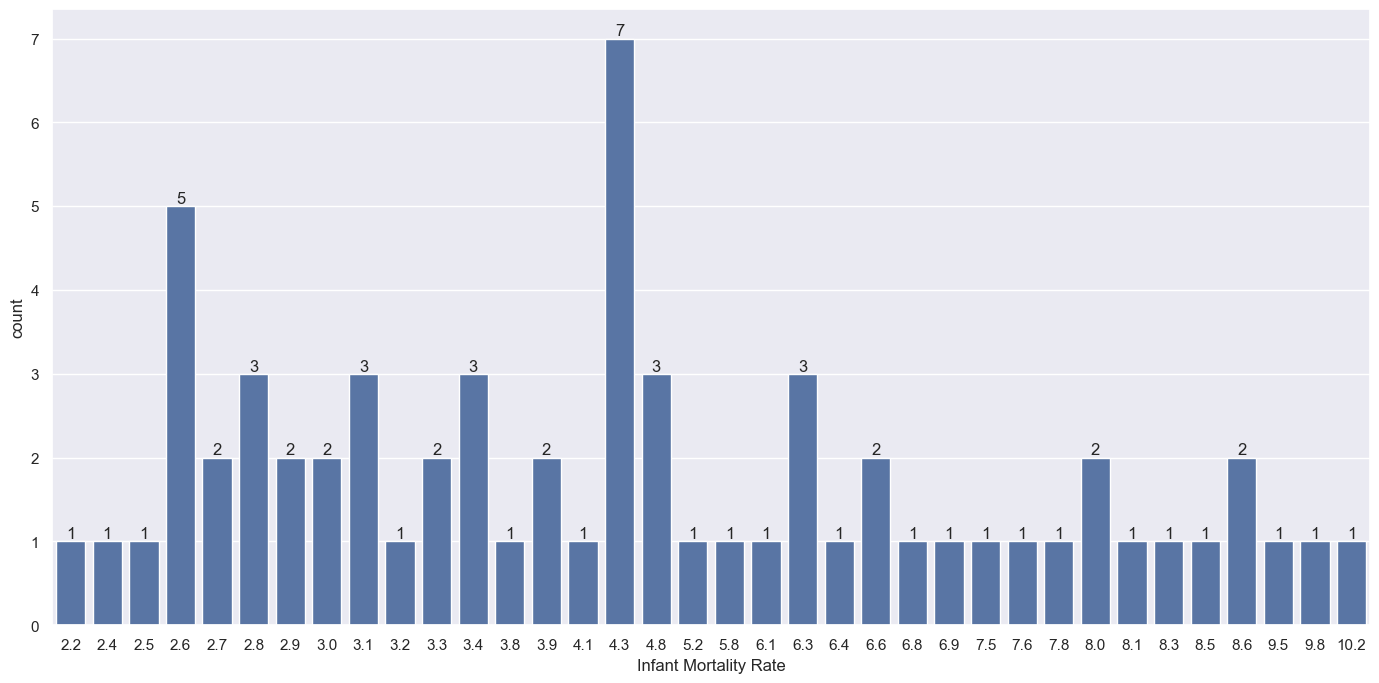

In [17]:
ax= sns.countplot(x= 'Infant Mortality Rate', data = df)
sns.set(rc={'figure.figsize':(16,8)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Materal Race or Ethnicity', ylabel='Infant Mortality Rate'>

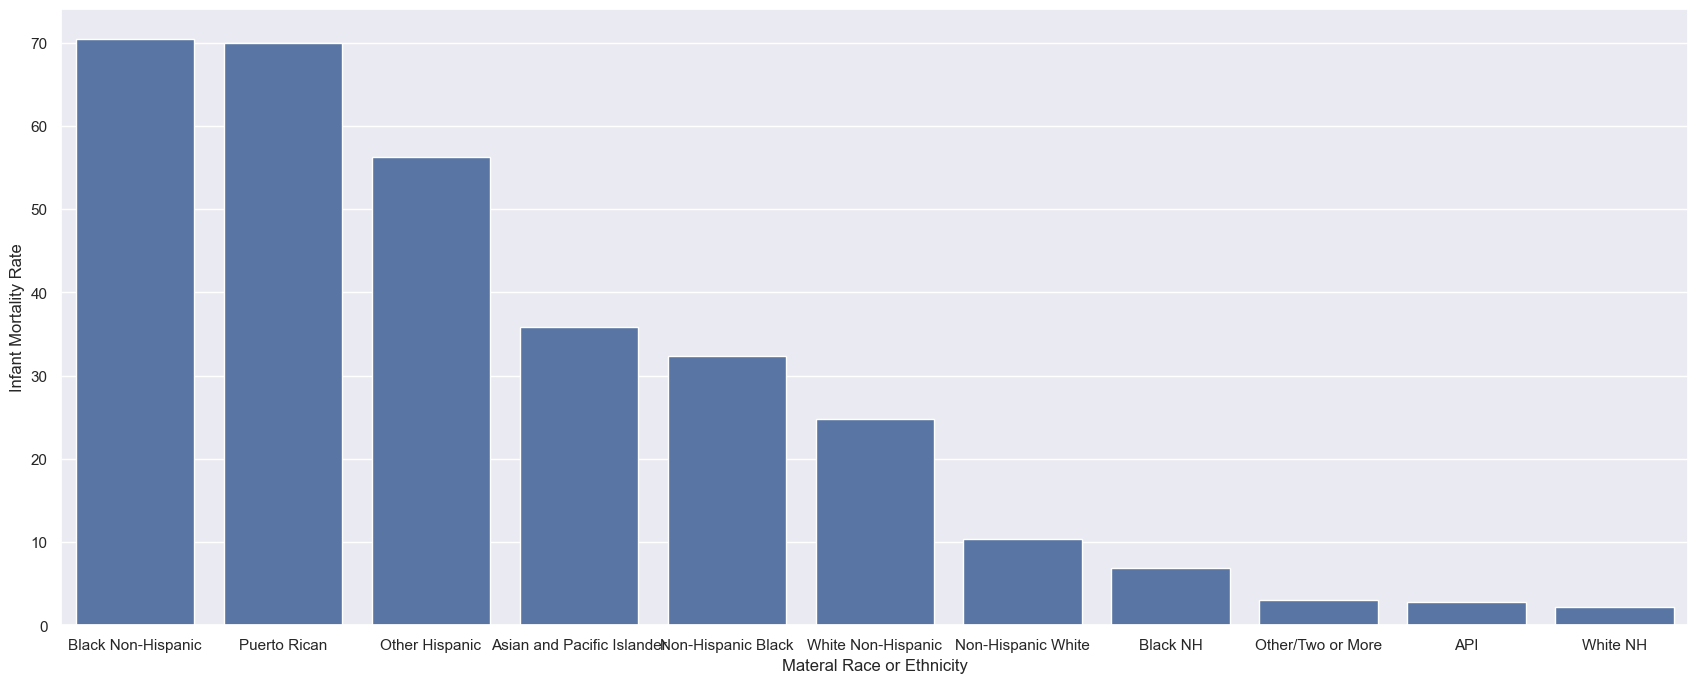

In [46]:
rates_gen = df.groupby (['Materal Race or Ethnicity'], as_index=False)['Infant Mortality Rate'].sum().sort_values(by='Infant Mortality Rate', ascending=False)
sns.set(rc={'figure.figsize':(21,8)})
sns.barplot(x= 'Materal Race or Ethnicity', y= 'Infant Mortality Rate', data = rates_gen)

In [47]:
df_numberofdeaths= df[['Year', 'Infant Deaths' , 'Neonatal Infant Deaths' , 'Postneonatal Infant Deaths']].groupby (['Year']).sum().sort_values(by=['Infant Deaths' , 'Neonatal Infant Deaths' , 'Postneonatal Infant Deaths'], ascending=False)

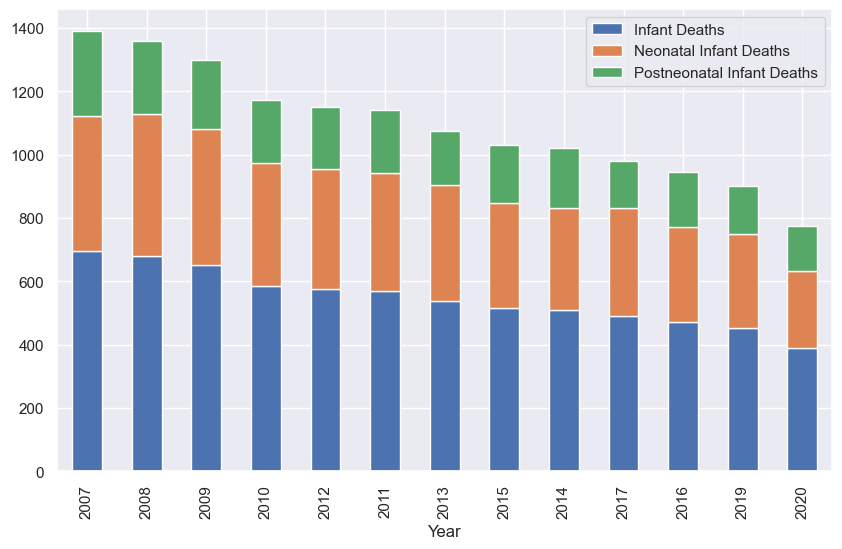

In [73]:
fig,ax = plt.subplots(figsize=(10,6))
df_numberofdeaths.plot(kind='bar',ax=ax,stacked=True)
plt.show()               

In [74]:
df.columns

Index(['Year', 'Materal Race or Ethnicity', 'Infant Mortality Rate',
       'Neonatal Mortality Rate', 'Postneonatal Mortality Rate',
       'Infant Deaths', 'Neonatal Infant Deaths', 'Postneonatal Infant Deaths',
       'Number of Live Births'],
      dtype='object')

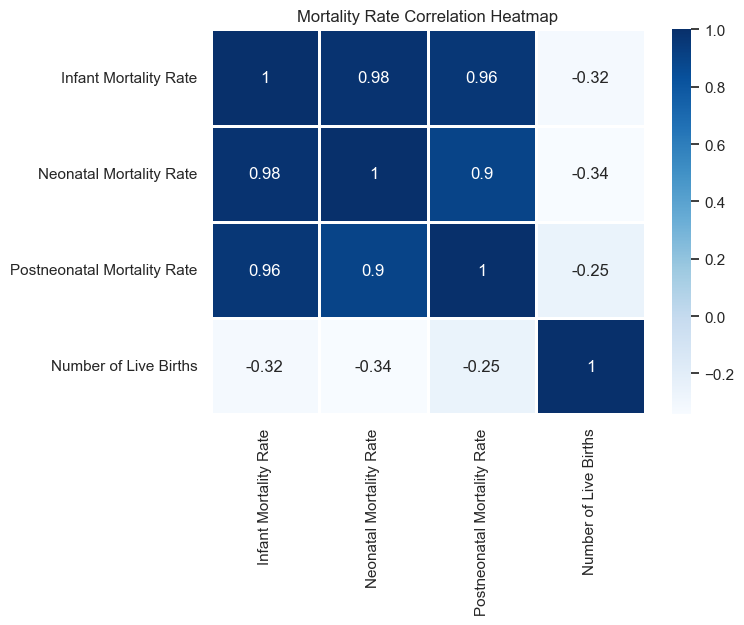

In [85]:
data_plot = df[['Infant Mortality Rate' , 'Neonatal Mortality Rate' , 'Postneonatal Mortality Rate' , 'Number of Live Births']]
correlation_matrix = data_plot.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap= "Blues", linewidth=2)
plt.title('Mortality Rate Correlation Heatmap')
plt.show()